<a href="https://colab.research.google.com/github/Alfikriangelo/MachineLearningTasks/blob/main/6thWeekTask/KMeansClustering_clusteringweek6_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
sns.set_style('darkgrid')

In [103]:
# Load the new dataset
data = pd.read_csv("sample_data/clusteringweek06.csv")

# Check the dataset structure (optional, for verification)
print(data.head())

    x1        x2        x3        x4        x5        x6        x7        x8  \
0  1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945 -0.150063   
1  1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835 -0.222475   
2  1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714 -0.242234   
3  1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501 -0.194347   
4  1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884 -0.265423   

         x9       x10  ...       x13       x14       x15       x16       x17  \
0 -0.171128  0.124676  ... -0.156436  0.082245  0.135752 -0.024017 -0.108351   
1 -0.207693  0.170883  ... -0.254341  0.022786  0.163320  0.012022 -0.090974   
2 -0.219153  0.232538  ... -0.237384  0.050791  0.207338  0.083536 -0.050691   
3 -0.098181  0.270375  ... -0.317084 -0.011567  0.100413 -0.050224 -0.136009   
4 -0.172700  0.266434  ... -0.298524  0.037439  0.219153  0.062837 -0.048885   

        x18       x19       x20       

In [104]:
#set number of clusters
NUM_CLUSTERS = 3
COLOR_LIST = ['green', 'orange', 'blue']

#create range of cluster names
cluster_ids = np.arange(NUM_CLUSTERS)

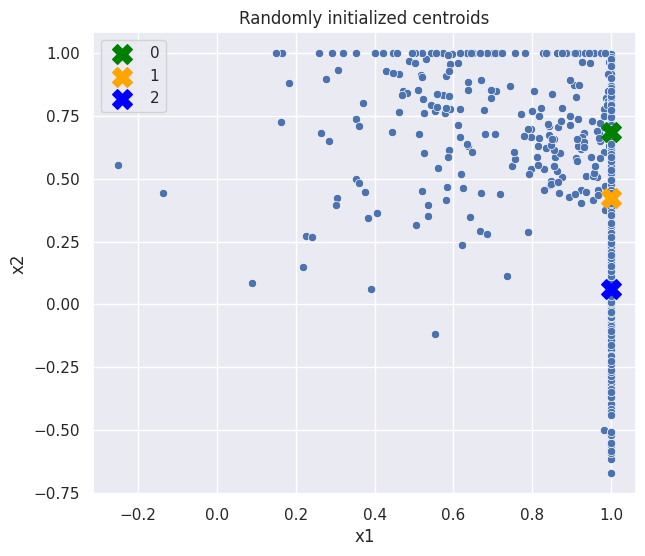

In [105]:
data_point_idxs = np.arange(data.shape[0])
random_idx = np.random.choice(data_point_idxs, size=NUM_CLUSTERS, replace=False)
clust_centers = data.iloc[random_idx].values

plt.figure(figsize=(7,6))
sns.scatterplot(data=data, x='x1', y='x2')
for clust_id, center in enumerate(clust_centers):
  plt.scatter(center[0], center[1], marker='X', s=200, color=COLOR_LIST[clust_id], label=clust_id)
plt.title('Randomly initialized centroids')
plt.legend()

In [106]:
# List containing initial cluster centers
center_list = []

# Select first center
random_idx = np.random.choice(data_point_idxs, size=1)[0]
center_list.append(data.values[random_idx])  # Replace X with data.values

# Calculate distances from the first center
distance = np.linalg.norm(data.values - center_list[0], axis=1)
distance_mtx = np.expand_dims(distance, axis=1)

# Next iteration
next_center = 1


In [107]:
#generate centers
while len(center_list) < NUM_CLUSTERS:

  #for each point, find distance from closest center
  dist_from_closest = np.min(distance_mtx, axis=1)

  #transform to probabilities
  selection_probs = dist_from_closest/dist_from_closest.sum()

  #select new center based on this probabiilities
  center_pt_idx = np.random.choice(data_point_idxs, p=selection_probs)

  #assign new centroid to center list
  center_list.append(data.values[center_pt_idx])
  next_center += 1

  #calculate distance from the new center
  distance = np.linalg.norm(data.values - data.values[center_pt_idx], axis=1)
  distance_mtx = np.column_stack([distance_mtx, distance])

In [108]:
#display cluster centers
clust_centers

array([[ 1.        ,  0.6867327 ,  0.77482589,  0.47712548, -0.05324551,
         0.04119028, -0.02352194,  0.18158822,  0.16072853, -0.24858667,
         0.04380976,  0.42419109, -0.21372123, -0.28933864,  0.26808218,
         0.11107115, -0.11011445,  0.04579899,  0.0768178 ,  0.17180013,
         0.07556786, -0.20369772],
       [ 1.        ,  0.42510129,  0.63219455,  0.29680388, -0.15512658,
         0.13294348,  0.25157535, -0.02576932, -0.06816785,  0.14370571,
         0.06739666, -0.0640594 , -0.0018882 ,  0.06969798,  0.04028517,
        -0.04782694, -0.01539131,  0.05914513, -0.04231737, -0.03507388,
         0.08173879,  0.02317832],
       [ 1.        ,  0.06276459,  0.1519542 ,  0.57720514,  0.24672596,
         0.0609718 , -0.16335806, -0.04960392,  0.19416649,  0.04033122,
        -0.12167566,  0.23197532,  0.19269949, -0.29768244, -0.16667686,
         0.29126985,  0.21149083, -0.15873685, -0.20177876, -0.06721353,
         0.20913018,  0.21358533]])

In [109]:
#set max_iter and tolerance
MAX_ITER = 100
TOLERANCE = 0.0001

#variable for current iteration
curr_iter = 0

#iterate until convergence or until max_iter is reached
while True:
  #each element of this list is np array containing distances from all points to the certain center
  distance_list = []

  #list that will be used to update centers
  new_centers = []

  #iterate through the centers
  for center in clust_centers:
    #calculate distance from all points to the current center and add to the list
    distance_list.append(np.linalg.norm(data.values - center, axis=1))

  #stack elements of distance list into 20 array
  distance_np = np.column_stack(distance_list)

  #find index of row containing minimum element
  point_cluster = np.argmin(distance_np, axis=1)

  #update centers
  for cluster_id in cluster_ids:
    new_centers.append(data.values[point_cluster == cluster_id].mean(axis=0))

  #transform new centers to np array
  new_centers = np.array(new_centers)

  #check if loop should be stopped due to MAX_ITER
  if curr_iter == MAX_ITER:
    break

  #check if centers have moved
  center_difference = np.linalg.norm(clust_centers - new_centers, axis=1)

  #check if centers are stable
  if center_difference.max() < TOLERANCE:
    break

  #make new centers clusst_centers
  clust_centers = new_centers

  #increase iteration counter
  curr_iter += 1


Text(0.5, 1.0, 'Final Clustering')

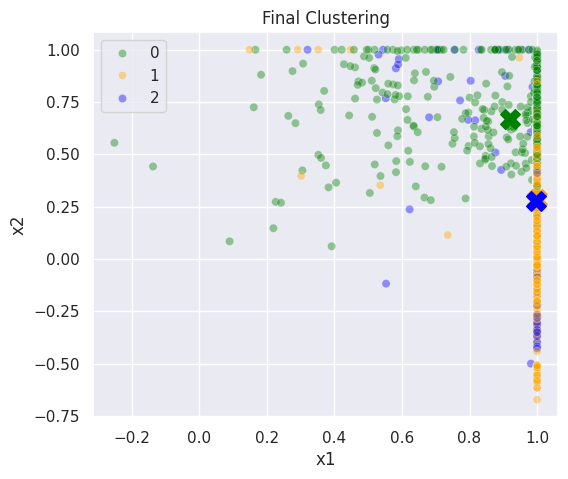

In [110]:
#plot final result
plt.figure(figsize=(6, 5))

sns.scatterplot(data=data, x='x1', y='x2', hue=point_cluster, palette=COLOR_LIST, alpha=0.4)

for clust_id, center in enumerate(clust_centers):
  plt.scatter(center[0], center[1], marker='X', s=200, color=COLOR_LIST[clust_id])

plt.title('Final Clustering')


# **Inertia in Clustering**

Inertia is a measure of how well a set of data points are clustered. It quantifies the total within-cluster variance, which is the sum of squared distances of each data point to its respective cluster centroid

In [111]:
#initialize inertia to 0
inertia = 0

#loop going through data points for each cluster
for clust_id in cluster_ids:

  #calculate inertia portion for current cluster
  clust_points = data.values[point_cluster == clust_id]
  distance_from_center = np.linalg.norm(clust_points - clust_centers[clust_id], axis=1)

  #increase inertia
  inertia += np.sum(distance_from_center ** 2)

In [112]:
inertia

2063.4947170767828

# **Selecting number of clusters**

In [113]:
pip install kneed

In [114]:
#sklearn imports
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

#pandas and numpy imports
import pandas as pd
import numpy as np

#plotting imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

#import knee detection algorithm
from kneed import KneeLocator

#set sns theme and set pandas to display all rows and columns
sns.set_theme()

In [115]:
# Load the new dataset
data = pd.read_csv("sample_data/clusteringweek06.csv")

# Keep only relevant columns for clustering (replace x1, x2 if needed)
data_filtered = data[['x1', 'x2']]

# Optional scaling (use if your data requires it for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filtered)

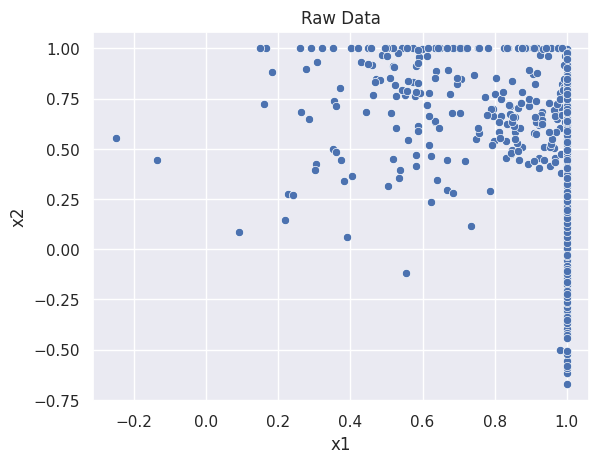

In [116]:
# Visualize the raw data
sns.scatterplot(x=data['x1'], y=data['x2'])
plt.title('Raw Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# **Selecting optimal number of clusters - inertia knee plot**

in this section we sill elbow (Knee) method for inertia to analyze clustering quality

Elbow (Knee) method for inertia is a technique used to determine the optimal number of clusters (k) in K-Mens clustering by plotting the inertia against different k values, and selecting the k where the rate of decrease in inertia sharply changes, resembling an 'elbow' in the curve

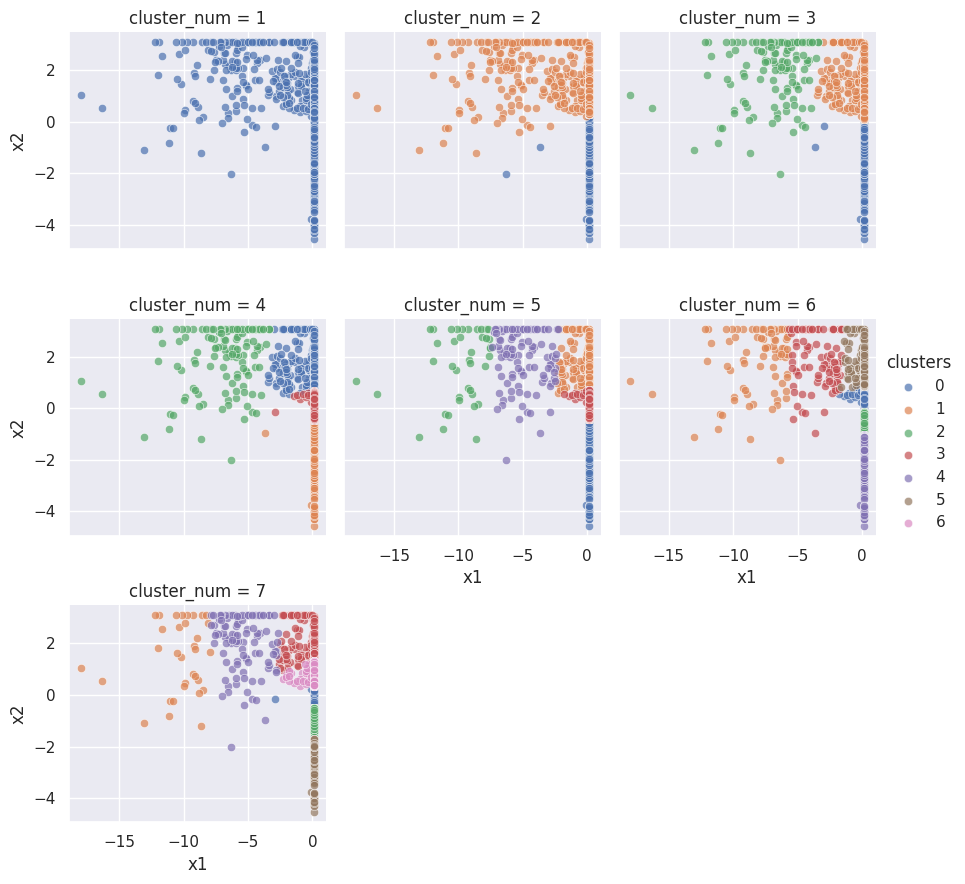

In [117]:
#set up multiple values of k
num_clusters = [1, 2, 3, 4, 5, 6, 7]

#list used to store inertia
inertia_list = []

#list used to store clusters
clusterring_result_list = []

#set up standar scaler
cluster_data = data[['x1', 'x2']]

#standardize the data
standard_scaler = StandardScaler()
standard_scaler.fit(cluster_data)
cluster_data = standard_scaler.transform(cluster_data)
cluster_data = pd.DataFrame(cluster_data, columns=['x1', 'x2'])

#perform clustering for multiple resoultions
for num_clust in num_clusters:

  #perform clustering for current number of clusters
  kmeans = KMeans(n_clusters=num_clust, n_init='auto')
  kmeans.fit(cluster_data)

  #calculate inertia
  inertia_list.append(kmeans.inertia_)

  #add clustering result to the list
  current_clustering = cluster_data.copy()
  current_clustering['clusters'] = kmeans.labels_
  current_clustering['cluster_num'] = num_clust
  clusterring_result_list.append(current_clustering)

#merge results for all values of num_clust
merged_clustering_result = pd.concat(clusterring_result_list, axis=0, ignore_index=True)

#plot all clusterings
g = sns.FacetGrid(merged_clustering_result, col='cluster_num', col_wrap=3, hue='clusters')
g.map(sns.scatterplot, 'x1', 'x2', alpha=.7)
g.add_legend()

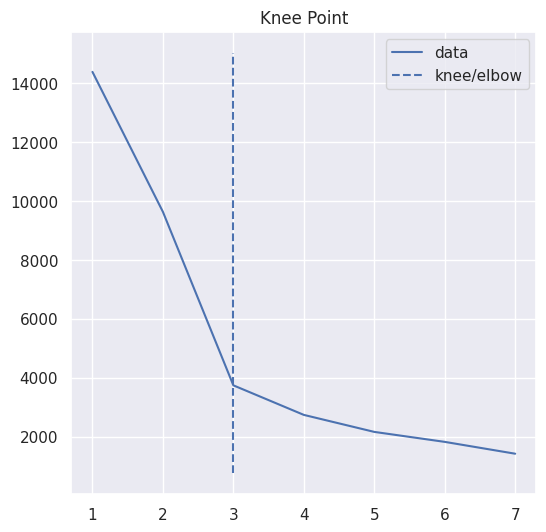

In [118]:
kneedle = KneeLocator(num_clusters, inertia_list, curve='convex', direction='decreasing')
kneedle.plot_knee()

# **Selecting optimal number of clusters - silhouette score**

in this section we still use silhouette score to analyze clustering quality. Silhouette score is a metric that measures the quality of a clustering solution by calculating the average silhouette coefficient for each data point, which consider both cohesion (how close points aree within a cluster) and separation (how distinct clusters are from each other), with values ranging from -1 (poor clustering) to 1(weel-defined clusters)

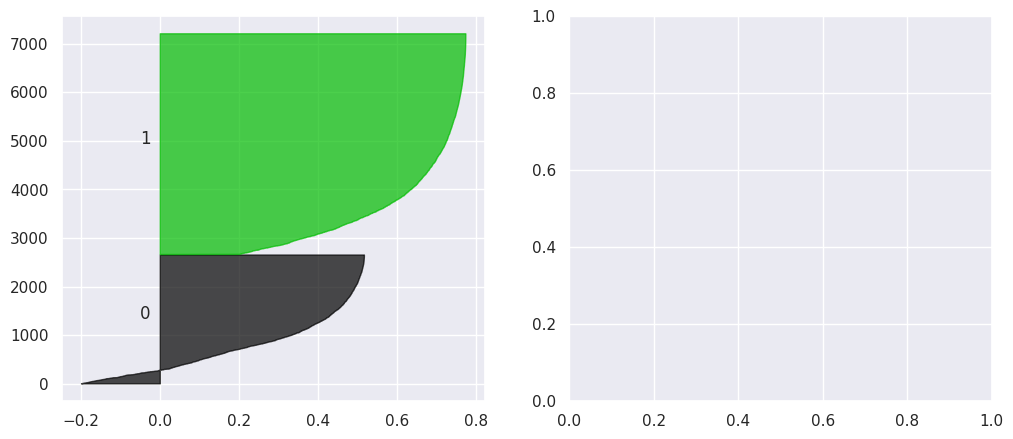

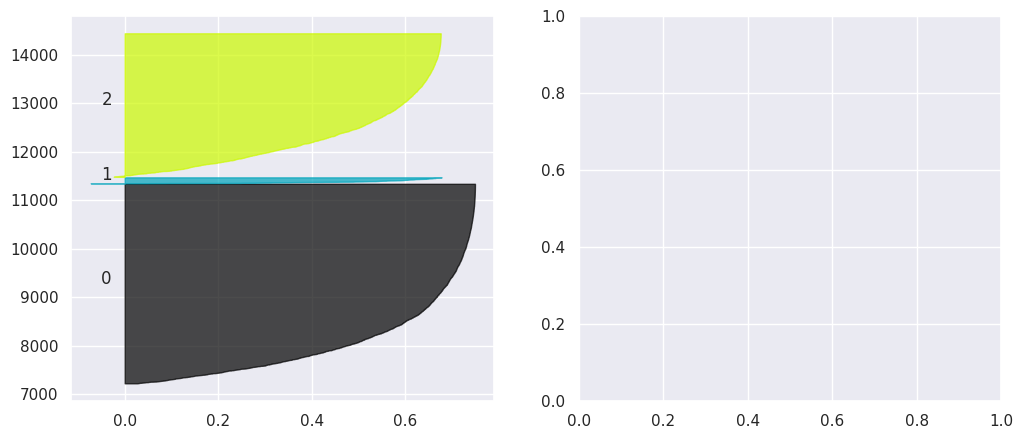

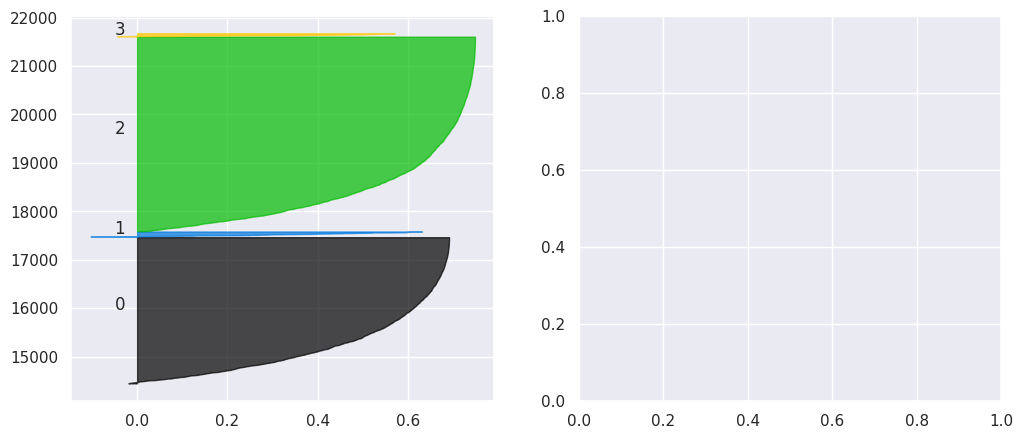

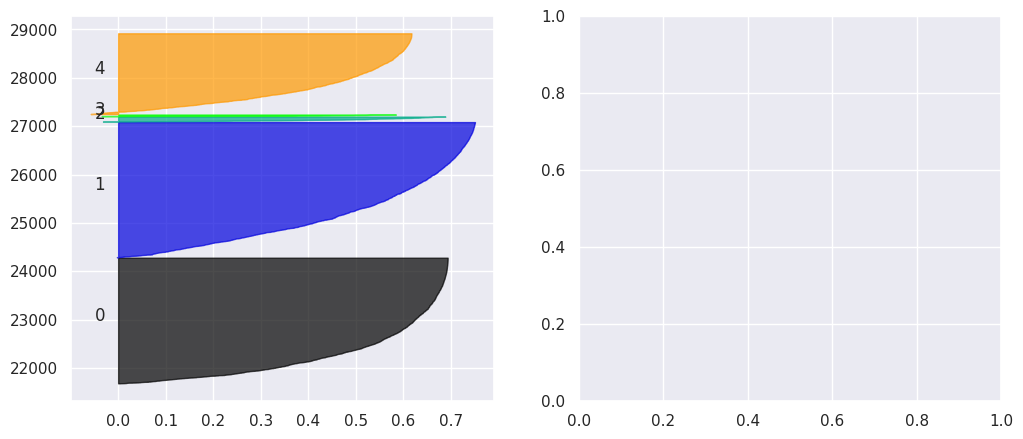

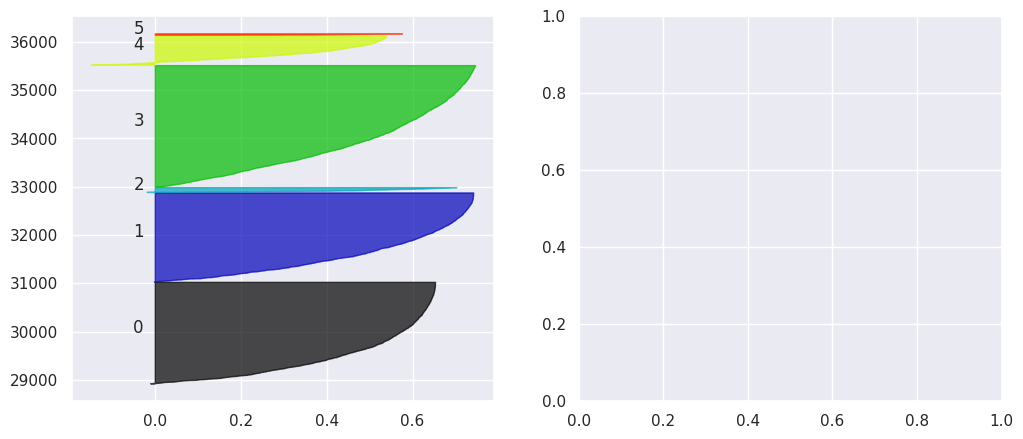

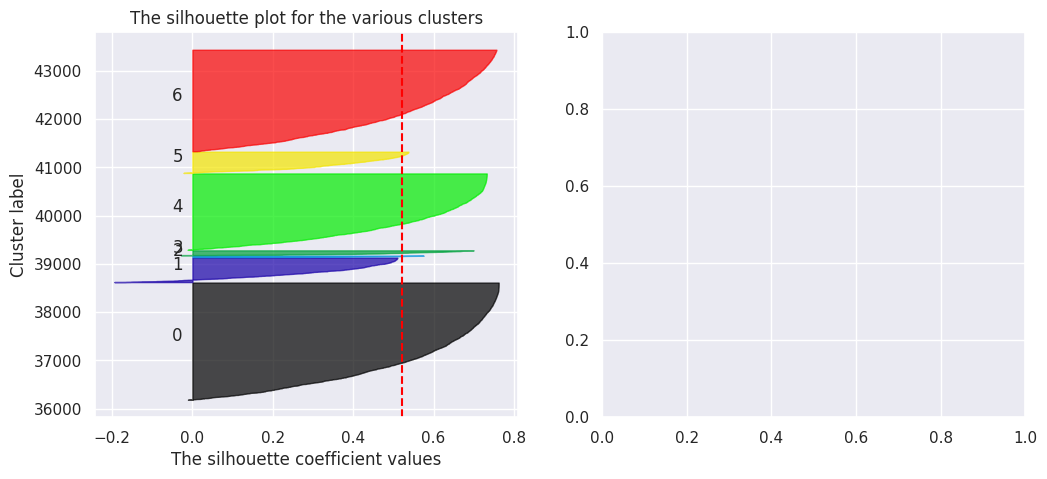

In [119]:
#set up multiple values of k
num_clusters = [2, 3, 4, 5, 6, 7, ]

#list for storing results
silhouette_score_list = []

#set up standard scaler
cluster_data = data[['x1', 'x2']]

standard_scaler = StandardScaler()
standard_scaler.fit(cluster_data)
cluster_data = standard_scaler.transform(cluster_data)
cluster_data = pd.DataFrame(cluster_data, columns=['x1', 'x2'])

#perform clustering for multiple resoultions lower y coordinate for the first silhouette plot
y_lower = 10
for num_clust in num_clusters:

  #perform clustering for current number of clusters
  kmeans = KMeans(n_clusters=num_clust, n_init='auto')
  kmeans.fit(cluster_data)

  #calculate average silhouette score
  silhouette_scr = silhouette_score(cluster_data, kmeans.labels_)
  silhouette_score_list.append(silhouette_scr)

  #calculate silhouette score for each data point
  sample_silhouette_values = silhouette_samples(cluster_data, kmeans.labels_)

  #plot clustering and silhouettte
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

  #plot silhouette scores for points belonging to each cluster
  for clust_i in range(num_clust):
    #get points belonging to the current cluster
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == clust_i]

    #sort points by silhouette value
    ith_cluster_silhouette_values.sort()

    #get size of current cluster
    size_cluster_i = ith_cluster_silhouette_values.shape[0]

    #get upper value of y coordinate for current cluster
    y_upper = y_lower + size_cluster_i

    #fill values between y_lower and y_upper with silhouette score values for data point
    color = cm.nipy_spectral(float(clust_i) / num_clust)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    #label the silhouette plots with their clusters numbers
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(clust_i))

    #compute the new y_lower for the next plot
    y_lower = y_upper + 10


#set title and labels silhouette subplot
ax1.set_title('The silhouette plot for the various clusters')
ax1.set_xlabel('The silhouette coefficient values')
ax1.set_ylabel('Cluster label')

#the vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_scr, color='red', linestyle='--')

#clear


Text(0, 0.5, 'Silhouette score value')

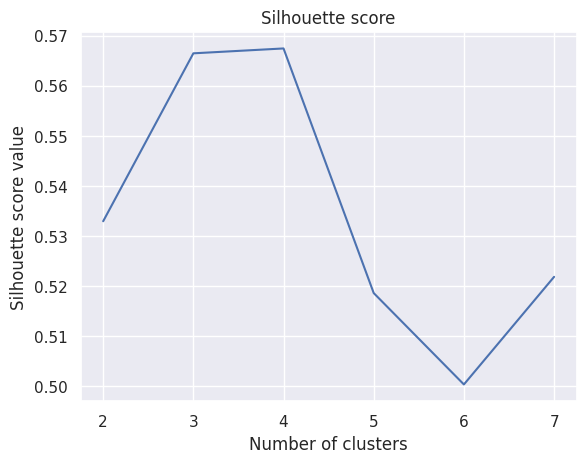

In [120]:
# Overall siluethe scores
plt.plot(num_clusters, silhouette_score_list)
plt.title('Silhouette score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score value')

In [121]:
# Hitung Davies-Bouldin Index
dbi_score = davies_bouldin_score(data.values, point_cluster)

print(f"Davies-Bouldin Index: {dbi_score}")

Davies-Bouldin Index: 1.36715518016733


# **Artificial dataset - 5 clusters**

In this section we will perform clustering on artificial dataset created with make_blobs function.

make_blobs is a function provided by the scikit-learn (sklearn) library in Python, which is used to generate synthetic datasets for clustering or classification tasks. It creates a set of Gaussian blobs with controllable properties such as the number of blobs, their centroids, standard deviations, and the total number of samples.

In [122]:
# Load data CSV
df = pd.read_csv('sample_data/clusteringweek06.csv')

In [123]:
# dataset memiliki kolom bernama x1 dan x2
X = df[['x1', 'x2']]

<Axes: xlabel='x1', ylabel='x2'>

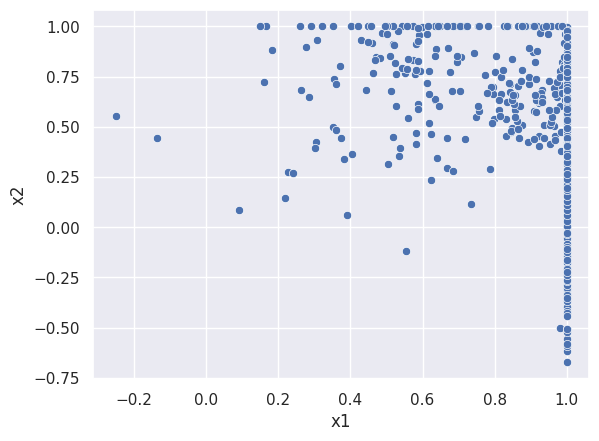

In [124]:
# Visualisasi data awal
sns.scatterplot(data=df, x='x1', y='x2')

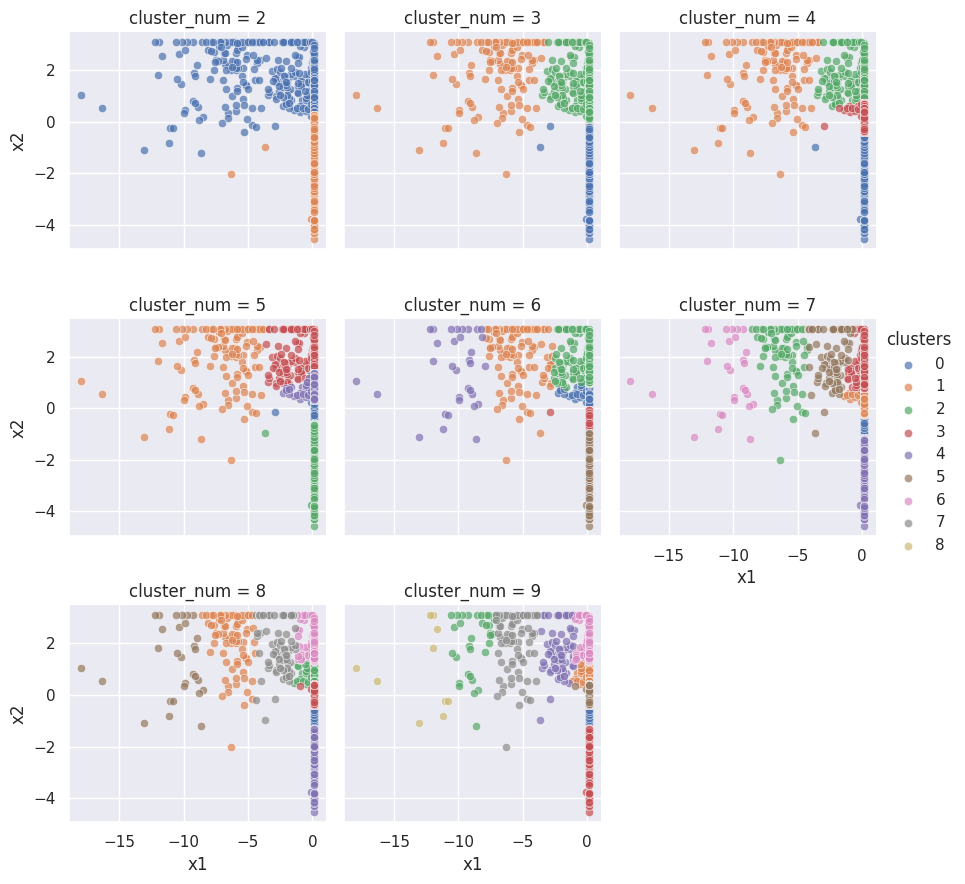

In [125]:
# Different numbers of k to try out
num_clusters = [2,3,4,5,6,7,8,9]
# Storage for inertia value
inertia_list = []
# Storage for silhouette scores
silhouette_score_list = []
# List used to store clustering results
clustering_result_list = []

# Use StandardScaler to standardize data
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

# Setelah data distandarisasi, ubah menjadi DataFrame dan beri nama kolom yang sesuai
artificial_df = pd.DataFrame(
    data=X_scaled,
    columns=['x1', 'x2']  # Sesuaikan jika nama kolom berbeda
)

# Perform clustering for different number of clusters
for num_clust in num_clusters:

    # Perform k means clustering
    kmeans = KMeans(n_clusters=num_clust, n_init='auto')
    kmeans.fit(artificial_df)

    # Calculate and store inertia & silhouette score
    inertia_list.append(kmeans.inertia_)
    silhouette_scr = silhouette_score(artificial_df, kmeans.labels_)
    silhouette_score_list.append(silhouette_scr)

    # Add clustering result to list
    current_clustering = artificial_df.copy()
    current_clustering['clusters'] = kmeans.labels_
    current_clustering['cluster_num'] = num_clust
    clustering_result_list.append(current_clustering)

# Merge results for all values of num_clust
merged_clustering_result = pd.concat(
    clustering_result_list,
    axis=0,
    ignore_index=True
)

# Plot all clusterings
g = sns.FacetGrid(
    merged_clustering_result,
    col="cluster_num",
    col_wrap=3,
    hue="clusters"
)
g.map(
    sns.scatterplot,
    'x1',
    'x2',
    alpha=.7
)
g.add_legend()

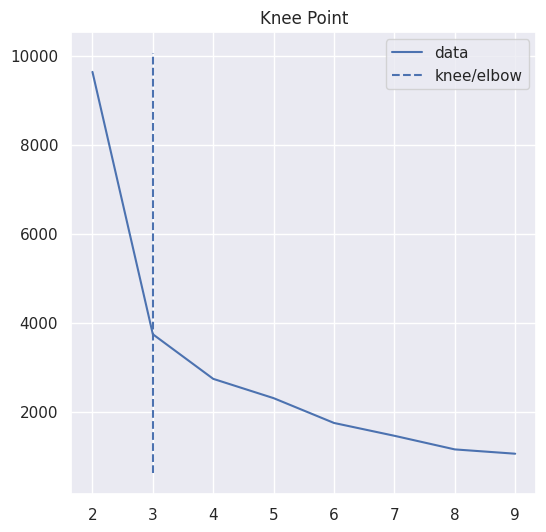

In [126]:
# Plot inertia
kneedle = KneeLocator(
    num_clusters,
    inertia_list,
    curve="convex",
    direction="decreasing"
)
kneedle.plot_knee()

Text(0, 0.5, 'Silhouette score value')

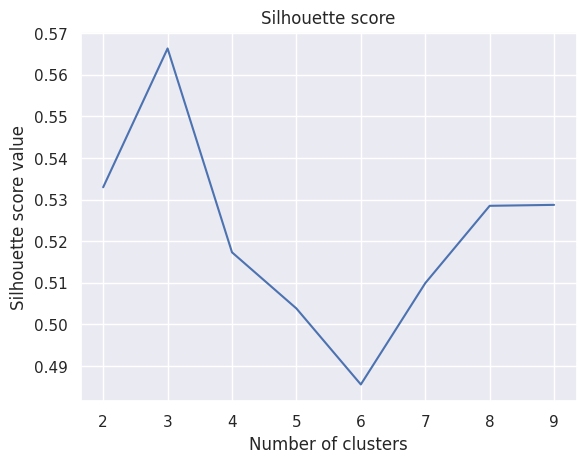

In [127]:
# Overall siluethe scores
plt.plot(num_clusters, silhouette_score_list)
plt.title('Silhouette score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score value')